# Defining Descriptive Statistics for Numeric Data

In [1]:
import numpy as np
import pandas as pd

def load_palmer_penguins(no_missing=True):
    url = "https://raw.githubusercontent.com/"
    url += "allisonhorst/palmerpenguins/main/"
    url += "inst/extdata/penguins.csv"
    numeric_features = [
        "bill_length_mm", "bill_depth_mm", 
        "flipper_length_mm", "body_mass_g"]
    target = ["species"]
    data = pd.read_csv(url)
    if no_missing:
        data = data.dropna()
    return data[numeric_features + target]
    
penguins = load_palmer_penguins(no_missing=True)

In [2]:
print(f"Your pandas version is: {pd.__version__}")
print(f"Your NumPy version is {np.__version__}")

Your pandas version is: 1.5.3
Your NumPy version is 1.23.5


In [3]:
print(penguins.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


## Measuring central tendency

In [4]:
print(penguins.mean(numeric_only=True))

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64


In [5]:
print(penguins.median(numeric_only=True))

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64


## Measuring variance and range

In [6]:
print(penguins.std(numeric_only=True))

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64


In [7]:
print(penguins.max(numeric_only=True) 
      - penguins.min(numeric_only=True))

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64


## Working with percentiles

In [8]:
print(penguins.select_dtypes(np.number).
      quantile([0,.25,.50,.75,1]))

      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0.00            32.1           13.1              172.0       2700.0
0.25            39.5           15.6              190.0       3550.0
0.50            44.5           17.3              197.0       4050.0
0.75            48.6           18.7              213.0       4775.0
1.00            59.6           21.5              231.0       6300.0


## Defining measures of normality

In [9]:
from scipy.stats import skew, skewtest
variable = penguins["body_mass_g"]
s = skew(variable)
zscore, pvalue = skewtest(variable)
print(f"Skewness {s:.3f} z-score " \
      f"{zscore:.3f} p-value {pvalue:.3f}")

Skewness 0.470 z-score 3.414 p-value 0.001


In [10]:
from scipy.stats import kurtosis, kurtosistest
variable = penguins["body_mass_g"]
k = kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print(f"Kurtosis {k:.3f} z-score {zscore:.3f} " \
      f"p-value {pvalue:.3f}")

Kurtosis -0.740 z-score -4.337 p-value 0.000


# Counting for Categorical Data

In [11]:
pcts = [0, .25, .5, .75, 1]
penguins_binned = pd.concat(
    [pd.qcut(penguins.iloc[:,0], pcts, precision=1),
     pd.qcut(penguins.iloc[:,1], pcts, precision=1),
     pd.qcut(penguins.iloc[:,2], pcts, precision=1),
     pd.qcut(penguins.iloc[:,3], pcts, precision=1)],
    join='outer', axis = 1)

## Understanding frequencies

In [12]:
print(penguins["species"].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


In [13]:
print(penguins_binned['body_mass_g'].value_counts())

(2699.9, 3550.0]    86
(3550.0, 4050.0]    86
(4775.0, 6300.0]    83
(4050.0, 4775.0]    78
Name: body_mass_g, dtype: int64


In [14]:
print(penguins_binned.describe())

       bill_length_mm bill_depth_mm flipper_length_mm       body_mass_g
count             333           333               333               333
unique              4             4                 4                 4
top      (32.0, 39.5]  (13.0, 15.6]    (171.9, 190.0]  (2699.9, 3550.0]
freq               86            85                95                86


## Creating contingency tables

In [15]:
print(pd.crosstab(penguins["species"],
                  penguins_binned['body_mass_g']))

body_mass_g  (2699.9, 3550.0]  (3550.0, 4050.0]  (4050.0, 4775.0]  \
species                                                             
Adelie                     64                50                32   
Chinstrap                  22                35                10   
Gentoo                      0                 1                36   

body_mass_g  (4775.0, 6300.0]  
species                        
Adelie                      0  
Chinstrap                   1  
Gentoo                     82  


In [16]:
pd.crosstab(penguins["species"],
                  penguins_binned['body_mass_g'])

body_mass_g  (2699.9, 3550.0]  (3550.0, 4050.0]  (4050.0, 4775.0]  \
species                                                             
Adelie                     64                50                32   
Chinstrap                  22                35                10   
Gentoo                      0                 1                36   

body_mass_g  (4775.0, 6300.0]  
species                        
Adelie                      0  
Chinstrap                   1  
Gentoo                     82

# Creating Applied Visualization for EDA

## Inspecting boxplots

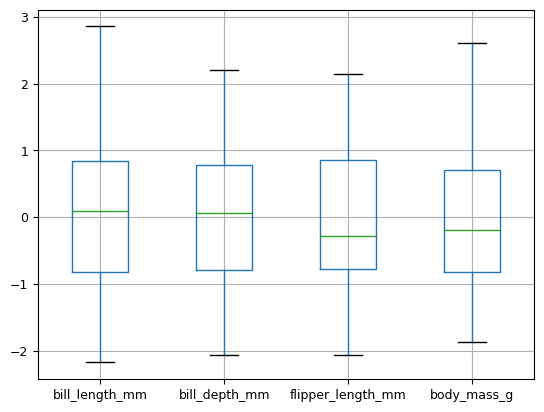

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = penguins.select_dtypes(
    include=['number'])
penguins_std = pd.DataFrame(
    scaler.fit_transform(numeric_features),
    columns=numeric_features.columns)

boxplots = penguins_std.boxplot(fontsize=9)

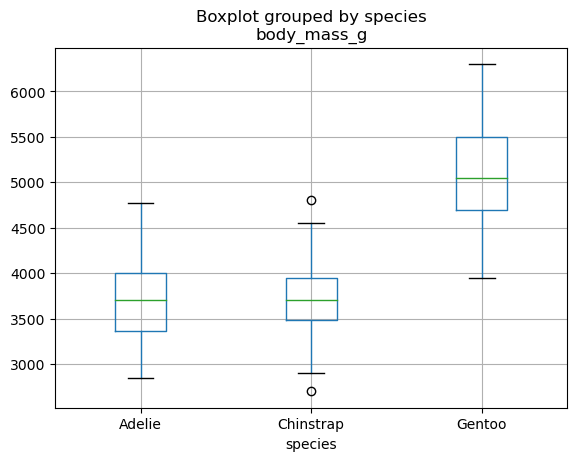

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
boxplots = penguins.boxplot(column='body_mass_g', 
                            by="species", fontsize=10)
plt.show()

## Performing t-tests after boxplots

In [19]:
from scipy.stats import ttest_ind

group0 = penguins['species'] == 'Adelie'
group1 = penguins['species'] == 'Chinstrap'
group2 = penguins['species'] == 'Gentoo'
variable = penguins['body_mass_g']

print(f"var1 {variable[group0].var():.3f} " \
      f"var2 {variable[group1].var():03f}")

var1 210332.428 var2 147713.454785


In [20]:
variable = penguins['body_mass_g']
t, pvalue = ttest_ind(variable[group0], variable[group1],
                      axis=0, equal_var=False)
print(f"t statistic {t:.3f} p-value {pvalue:.3f}")

t statistic -0.448 p-value 0.655


In [21]:
from scipy.stats import f_oneway
variable = penguins['body_mass_g']
f, pvalue = f_oneway(variable[group0], 
                     variable[group1], 
                     variable[group2])
print(f"One-way ANOVA F-value {f:.3f} "
      f"p-value {pvalue:.3f}")

One-way ANOVA F-value 341.895 p-value 0.000


## Observing parallel coordinates

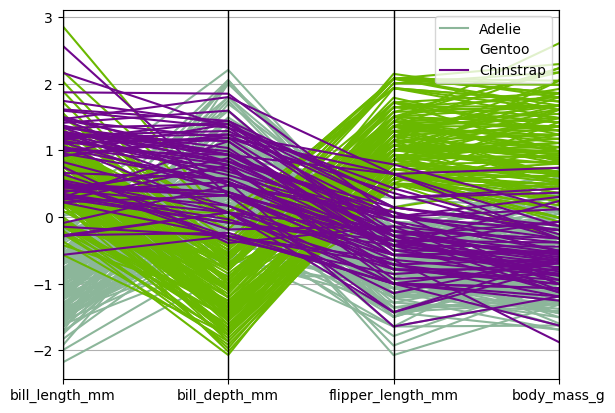

In [22]:
from pandas.plotting import parallel_coordinates

penguins_std["species"] = penguins["species"].values
pll = parallel_coordinates(penguins_std, "species")

## Graphing distributions

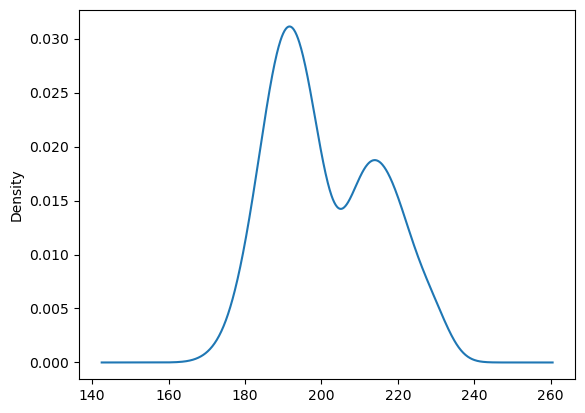

In [23]:
densityplot = (penguins["flipper_length_mm"]
              .plot(kind="density"))

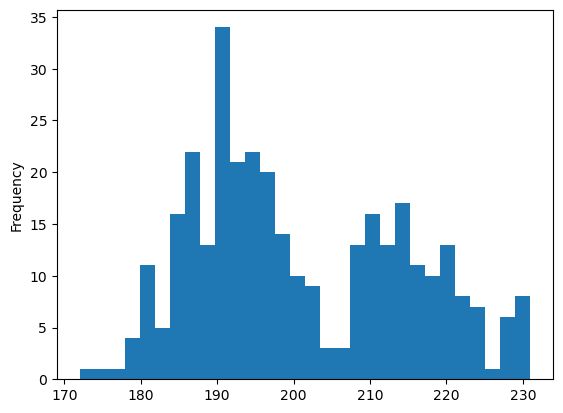

In [24]:
single_distribution = (penguins["flipper_length_mm"]
                       .plot(kind="hist", bins=30))

## Plotting scatterplots

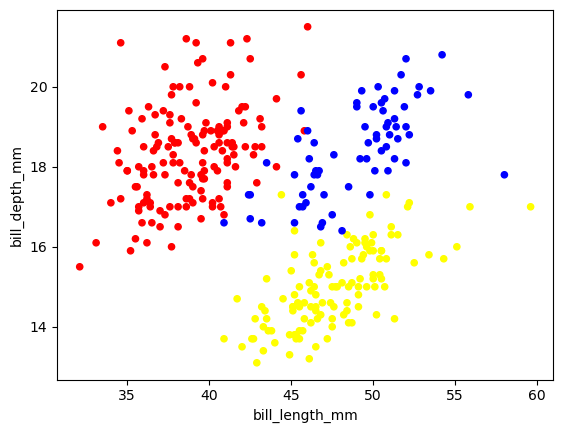

In [25]:
palette = {'Adelie': 'red', 'Gentoo': 'yellow', 'Chinstrap':'blue'}
colors = [palette[c] for c in penguins['species']]
simple_scatterplot = penguins.plot(
                kind='scatter', x='bill_length_mm', 
                y='bill_depth_mm', c=colors)

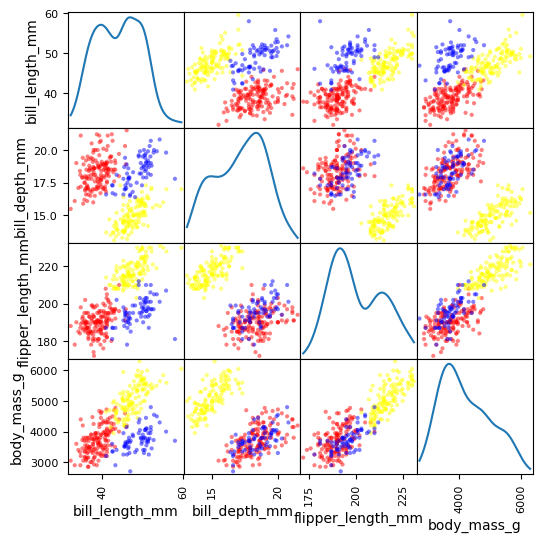

In [26]:
from pandas.plotting import scatter_matrix
palette = palette = {'Adelie': 'red', 'Gentoo': 'yellow', 
                     'Chinstrap':'blue'}
colors = [palette[c] for c in penguins['species']]
matrix_of_scatterplots = scatter_matrix(
    penguins, figsize=(6, 6), 
    color=colors, diagonal='kde')

# Understanding Correlation

## Using covariance and correlation

In [27]:
penguins.select_dtypes(np.number).cov()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm          29.906333      -2.462091          50.058195   
bill_depth_mm           -2.462091       3.877888         -15.947248   
flipper_length_mm       50.058195     -15.947248         196.441677   
body_mass_g           2595.623304    -748.456122        9852.191649   

                     body_mass_g  
bill_length_mm       2595.623304  
bill_depth_mm        -748.456122  
flipper_length_mm    9852.191649  
body_mass_g        648372.487699

In [28]:
penguins.select_dtypes(np.number).corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000

In [29]:
import numpy as np

covariance_matrix = np.cov(penguins.iloc[:,:4], rowvar=0)
correlation_matrix = np.corrcoef(penguins.iloc[:,:4], 
                                 rowvar=0)

In [30]:
penguins.select_dtypes(np.number).corr()**2

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000       0.052270           0.426534   
bill_depth_mm            0.052270       1.000000           0.333843   
flipper_length_mm        0.426534       0.333843           1.000000   
body_mass_g              0.347453       0.222799           0.762092   

                   body_mass_g  
bill_length_mm        0.347453  
bill_depth_mm         0.222799  
flipper_length_mm     0.762092  
body_mass_g           1.000000

## Using nonparametric correlation

In [31]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

a = penguins['bill_length_mm']
b = penguins['bill_depth_mm']
rho_coef, rho_p = spearmanr(a, b)

r_coef, r_p = pearsonr(a, b)
print(f"Pearson r {r_coef:.3f} | "
      f"Spearman rho {rho_coef:.3f}")

Pearson r -0.229 | Spearman rho -0.214


## Considering chi-square for tables

In [32]:
from scipy.stats import chi2_contingency
table = pd.crosstab(penguins["species"], 
                    penguins_binned["bill_length_mm"])
chi2, p, dof, expected = chi2_contingency(table.values)
print(f"Chi-square {chi2:.2f} p-value {p:.3f}")

Chi-square 264.02 p-value 0.000


# Working with Cramér's V

In [33]:
n = len(penguins)
k, r = table.shape
V = np.sqrt(chi2 / (n * min(k-1, r-1)))
print(f"Cramer's V {V:.2f}")

Cramer's V 0.63


# Modifying Data Distribution

## Creating a Z-score standardization

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bill_depth_mm = scaler.fit_transform(
    penguins[['bill_depth_mm']])

## Transforming into other notable distributions

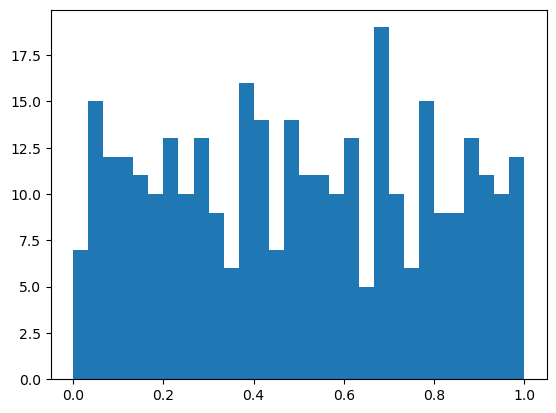

In [35]:
from sklearn.preprocessing import QuantileTransformer

uniform = QuantileTransformer(
    n_quantiles=30, output_distribution="uniform")
bill_depth_mm = uniform.fit_transform(
    penguins[['bill_depth_mm']])
plt.hist(bill_depth_mm, bins=30);

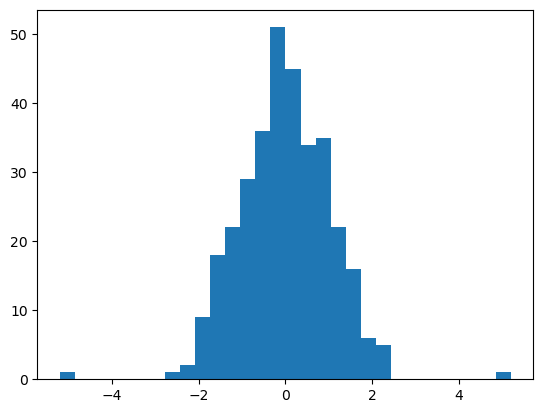

In [36]:
normal = QuantileTransformer(
    n_quantiles=30, output_distribution="normal")
bill_depth_mm = normal.fit_transform(
    penguins[['bill_depth_mm']])
plt.hist(bill_depth_mm, bins=30);